# Challenge Set 4 (Linear Learning)¶

Topic: 

Date: 01/22/2016

Name: Kenneth Myers

Worked with: NA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Challenge 1

In [2]:
B0 = random.random()*10
B1 = random.random()*10

f = np.random.randn(1000)*1000
x = np.random.choice(np.arange(1,100000), 1000) + f
e = np.random.randn(1000)
y = B0 + B1*np.log(x) + e

In [3]:
#print(log_data)

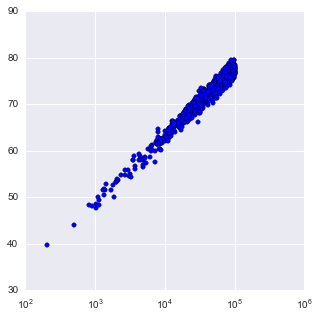

In [4]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')

plt.xscale('log')

### Quadratic fit

In [5]:
log_data = pd.DataFrame({'y':y, 'x':x, 'x2': np.power(x,2)})
log_data = log_data.dropna()
#log_data['const'] = [1 for i in range(len(x))] <---- no need for this line when working with smf.ols

In [6]:
def getQuadModel(data):
    model = smf.ols(formula='y ~ np.square(x) + x', data=data)
    results = model.fit()
    return results

In [7]:
def getPlot(results, title, ylabel='Y', xlabel='X', var=1):
    sm.graphics.plot_fit(results, var)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

In [8]:
quad_fit = getQuadModel(log_data)

In [9]:
quad_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     4075.
Date:                Sun, 24 Jan 2016   Prob (F-statistic):               0.00
Time:                        01:14:24   Log-Likelihood:                -2066.2
No. Observations:                 997   AIC:                             4138.
Df Residuals:                     994   BIC:                             4153.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       57.4930      0.193    298.501      0.000        57.115    57.871
np.square(x) -2.869e-09   8.27e-11    -34.675      0.000     -3.03e-09 -2.71e-09
x                0.0005   8.69e-06     54.019      0.000         0.000     0.000
==============================================================================
Omnibus:                      569.777   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8413.396
Skew:                          -2.305   Prob(JB):                         0.00
Kurtosis:                      16.464   Cond. No.                     1.45e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

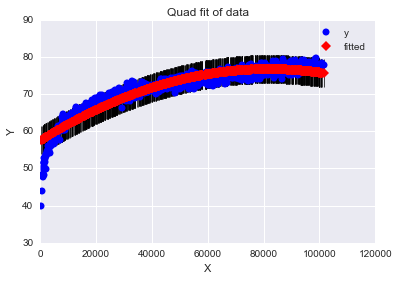

In [10]:
getPlot(quad_fit, title='Quad fit of data', var=2)

In [11]:
log_data = sm.tools.tools.add_constant(log_data)
log_data.head()

,const,x,x2,y
0,1,41272.760083,1.703441e+09,70.675840
1,1,26181.356520,6.854634e+08,68.017324
2,1,21408.692763,4.583321e+08,69.031721
3,1,73951.971654,5.468894e+09,76.996312
4,1,36264.458249,1.315111e+09,71.264318


### Log fit

In [12]:
def getLogModel(data):
    model = smf.ols(formula='y ~ np.log(x)', data=data)
    results = model.fit()
    return results

In [13]:
log_fit = getLogModel(log_data)

In [14]:
log_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 3.382e+04
Date:                Sun, 24 Jan 2016   Prob (F-statistic):               0.00
Time:                        01:14:24   Log-Likelihood:                -1400.2
No. Observations:                 997   AIC:                             2804.
Df Residuals:                     995   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.7204      0.360     15.894      0.000         5.014     6.427
np.log(x)      6.2393      0.034    183.911      0.000         6.173     6.306
==============================================================================
Omnibus:                        0.529   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.431
Skew:                          -0.041   Prob(JB):                        0.806
Kurtosis:                       3.060   Cond. No.                         123.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

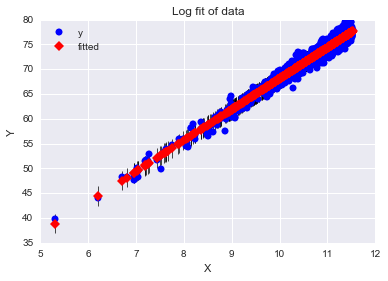

In [15]:
getPlot(log_fit, title='Log fit of data', var=1)

This seems accurate, the fit seems to match the data.

## Challenge 2

In [16]:
np.random.seed(101)

B0 = random.random()*10
B1 = random.random()*10
B2 = random.random()*10

f = np.random.randn(1000)
x = np.random.choice(np.arange(1,10), 1000)*f
e = random.random()*3*np.random.choice(range(200), 1000)
y = B0 + B1*x + B2*np.square(x) + e


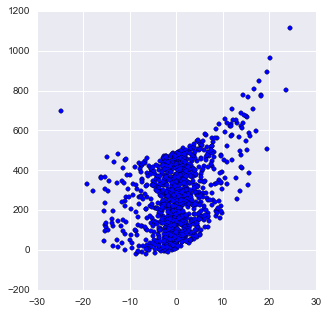

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(x,y, marker='o')


In [18]:
quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})

In [19]:
quad_data = sm.add_constant(quad_data)

In [20]:
train, test = train_test_split(quad_data, test_size = 0.25)

In [21]:
quad_fit_2 = getQuadModel(train)

In [22]:
quad_fit_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     156.9
Date:                Sun, 24 Jan 2016   Prob (F-statistic):           1.27e-57
Time:                        01:14:25   Log-Likelihood:                -4789.8
No. Observations:                 750   AIC:                             9586.
Df Residuals:                     747   BIC:                             9600.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept      247.3345      5.903     41.898      0.000       235.746   258.923
np.square(x)     0.8190      0.081     10.143      0.000         0.660     0.977
x               10.9388      0.930     11.757      0.000         9.112    12.765
==============================================================================
Omnibus:                      623.612   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.738
Skew:                          -0.023   Prob(JB):                     7.10e-11
Kurtosis:                       1.778   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

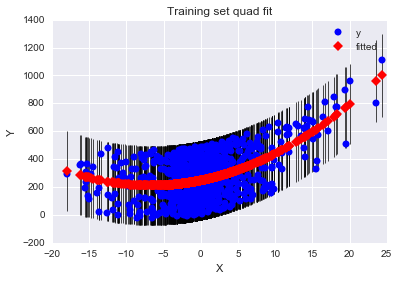

In [23]:
getPlot(quad_fit_2, title='Training set quad fit', var = 2)

In [24]:
test.head()

,const,x,x2,y
865,1,-0.230439,0.053102,220.483731
460,1,1.323162,1.750757,403.765110
727,1,-1.280880,1.640652,172.315355
293,1,4.115243,16.935222,226.995657
118,1,4.699896,22.089025,150.099218


In [25]:
def quadPlotTest(results, train, test, dpdnt='y', indp1='x', indp2='x2', const='const'):
    test = test.sort_values(by=indp1, ascending=True)
    plt.scatter(train[indp1], train[dpdnt], label='Training', color = 'red')
    plt.plot(test[indp1], results.predict(test[[const, indp2, indp1]]), color='black',linewidth=1, label='Test')
    plt.xlabel(indp1)
    plt.ylabel(dpdnt)
    plt.legend(loc='upper left')
    plt.title('Training and Testing Data')

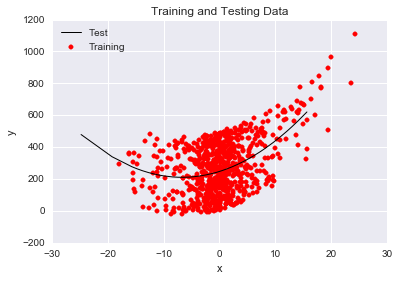

In [26]:
quadPlotTest(quad_fit_2, train, test)

### MSE Calculations

##### Training 

In [27]:
mean_squared_error(train.y, quad_fit_2.predict(train[['const', 'x', 'x2']]))

20641.286524756575

##### Testing 

In [28]:
mean_squared_error(test.y, quad_fit_2.predict(test[['const', 'x', 'x2']]))

20823.24382615216

## Challenge 3 

For the data from two (above), try polynomial fits from 0th (just constant) 

to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot

**training error**

**test error**

**R squared**

**AIC**




In [29]:
def getPolyModel(data, i):
    formula = 'y ~ 1'
    for num in range(i):
        formula += (' + np.power(x,' + str(num+1) + ')')
    
    #print(formula)
    
    model = smf.ols(formula=formula, data=data)
    results = model.fit()
    return results

In [30]:
def iterQuadDataPolyModel(quad_data, numIter):
    train_list = []
    test_list = []
    Rsq_list = []
    AIC_list = []
    
    np.random.seed(101)

    B0 = random.random()*10
    B1 = random.random()*10
    B2 = random.random()*10

    f = np.random.randn(1000)
    x = np.random.choice(np.arange(1,10), 1000)*f
    e = random.random()*3*np.random.choice(range(200), 1000)
    y = B0 + B1*x + B2*np.square(x) + e
    
    quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})
    quad_data = sm.add_constant(quad_data)
    train, test = train_test_split(quad_data, test_size = 0.25)
    
    for i in range(numIter):
        temp_result = getPolyModel(train, i)
        
        train_list.append(mean_squared_error(train.y, temp_result.predict(train[['const', 'x', 'x2']])))
        test_list.append(mean_squared_error(test.y, temp_result.predict(test[['const', 'x', 'x2']])))
        Rsq_list.append(temp_result.rsquared)
        AIC_list.append(temp_result.aic)
        
    c3_df = pd.DataFrame({'Train_MSE':train_list, 'Test_MSE':test_list, 'Rsquared':Rsq_list, 'AIC':AIC_list})
    return c3_df

In [31]:
c3_df = iterQuadDataPolyModel(quad_data, 8)

In [32]:
c3_df

,AIC,Rsquared,Test_MSE,Train_MSE
0,11815.292534,0.000000,412238.530323,405623.085056
1,11761.747692,0.071384,481204.351806,376668.156345
2,8900.613257,0.979587,8353.065370,8280.074762
3,8901.943426,0.979605,8398.506857,8272.683063
4,8903.905291,0.979606,8449.000639,8272.262431
5,8905.028693,0.979630,8290.215332,8262.599484
6,8907.028374,0.979630,8299.192288,8262.595973
7,8908.802736,0.979636,9780.121457,8260.110535


In [33]:
def plotC3(yvalue):
    c3_df.plot(c3_df.index, yvalue)
    plt.xlabel('Polynomial Order')
    plt.ylabel(yvalue)
    plt.title(yvalue + ' for each Polynomial Order')

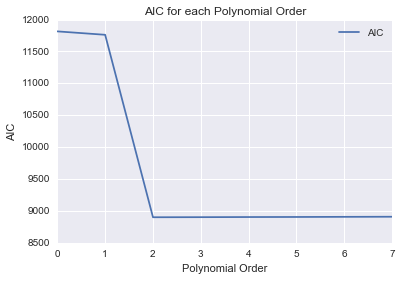

In [34]:
plotC3('AIC')

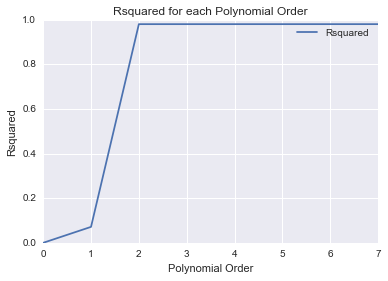

In [35]:
plotC3('Rsquared')

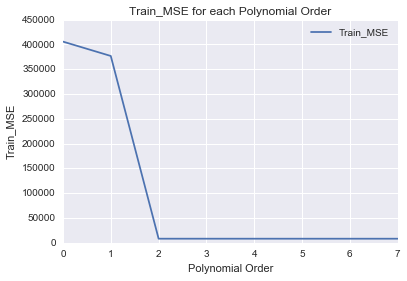

In [36]:
plotC3('Train_MSE')

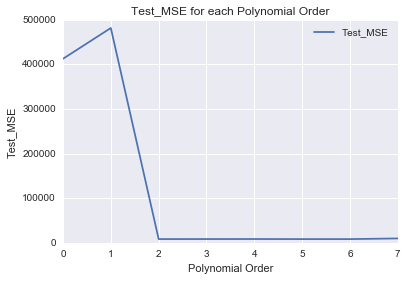

In [37]:
plotC3('Test_MSE')

## Challenge 4

In [59]:
def iterQuadDataByDataSize():
    train_list = []
    test_list = []
    training_size = []
    
    np.random.seed(101)

    B0 = random.random()*10
    B1 = random.random()*10
    B2 = random.random()*10

    f = np.random.randn(1000)
    x = np.random.choice(np.arange(1,10), 1000)*f
    e = random.random()*3*np.random.choice(range(200), 1000)
    y = B0 + B1*x + B2*np.square(x) + e
    
    quad_data = pd.DataFrame({'x':x,'y':y,'x2':np.square(x)})
    quad_data = sm.add_constant(quad_data)
    
    step_size = 5
    steps = int(len(quad_data)/step_size)
    data_end = 5
    
    for i in range(steps):
        train, test = train_test_split(quad_data[:data_end], test_size = 0.25)
        temp_result = getQuadModel(quad_data)
        
        train_list.append(mean_squared_error(train.y, temp_result.predict(train[['const', 'x', 'x2']])))
        test_list.append(mean_squared_error(test.y, temp_result.predict(test[['const', 'x', 'x2']])))
        training_size.append(len(train))
        
        data_end += step_size
        
        
    c4_df = pd.DataFrame({'Train_MSE':train_list, 'Test_MSE':test_list, 'Training_Size':training_size})
    return c4_df

In [68]:
c4_df = iterQuadDataByDataSize()

In [69]:
c4_df.head()

,Test_MSE,Train_MSE,Training_Size
0,30615.887325,25051.881412,3
1,32418.600617,15674.499668,7
2,16657.192636,20871.371951,11
3,20239.129639,17917.761369,15
4,7223.582917,25514.469907,18


In [70]:
def plotC4(df):
    ax = df.plot('Training_Size', 'Train_MSE', label='Train_MSE', figsize=(10,10))
    df.plot('Training_Size', 'Test_MSE', label='Test_MSE', ax=ax)
    plt.xlabel('Training Size')
    plt.ylabel('MSE')
    plt.title('MSE for Trainings and Tests by Training Size')

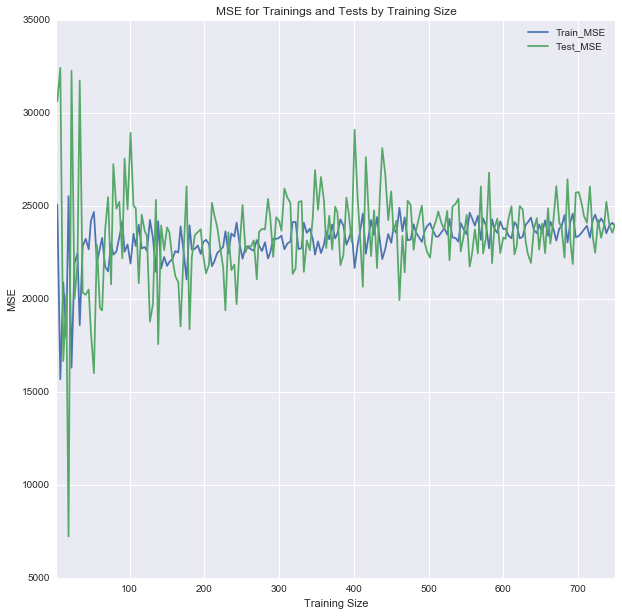

In [71]:
plotC4(c4_df)